# Importing all the necessary libraries

In [2]:
#Suja Basnet
#IOT project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Reading csv file

In [3]:
data=pd.read_csv("temp_humidity.csv")
data

,Timestamp,Temperature,Humidity,Location,Date,Time
0,4/17/21 15:52,23,29,Library,4/17/21,15:52:00
1,4/17/21 15:54,23,33,Library,4/17/21,15:54:00
2,4/17/21 15:56,23,29,Library,4/17/21,15:56:00
3,4/17/21 15:58,23,29,Library,4/17/21,15:58:00
4,4/17/21 16:00,23,29,Library,4/17/21,16:00:00
...,...,...,...,...,...,...
300,4/21/21 20:47,20,25,Home,4/21/21,20:47:00
301,4/21/21 20:49,19,25,Home,4/21/21,20:49:00
302,4/21/21 20:51,19,25,Home,4/21/21,20:51:00
303,4/21/21 20:53,19,25,Home,4/21/21,20:53:00


# Splitting the Timestamp to Date and Time

In [4]:
data['Timestamp']= pd.to_datetime(data['Timestamp'])
data['Date']= data['Timestamp'].apply(lambda x : datetime.strftime(x,'%D')) #lambda function is used for taking date from Timestamp
data['Time']= data['Timestamp'].apply(lambda x : datetime.strftime(x,'%T')) #lambda function is used for taking time from Timestamp
print(data)

NameError: name 'datetime' is not defined

# Component 2. Data Plotting

# Line Plot

Text(0.5, 1.0, 'Times vs Temperature')

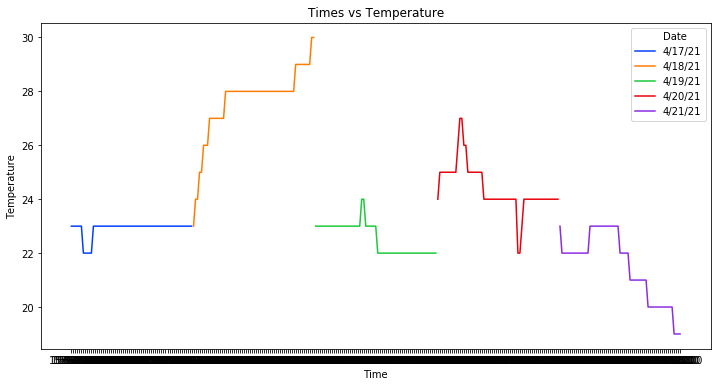

In [5]:
plt.figure(figsize=(12,6))
ax=sns.lineplot(data=data, x="Time", y="Temperature", hue="Date",palette="bright")
ax.set_title("Times vs Temperature")



Text(0.5, 1.0, 'Time vs Humidity')

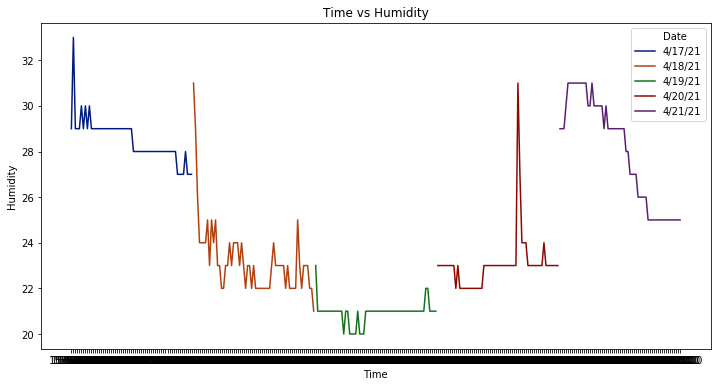

In [6]:
plt.figure(figsize=(12,6)) #for the figure size
ax=sns.lineplot(data=data, x="Time", y="Humidity", hue="Date",palette="dark")
ax.set_title("Time vs Humidity")



# Box Plot

Text(0.5, 1.0, 'Date vs Temperature')

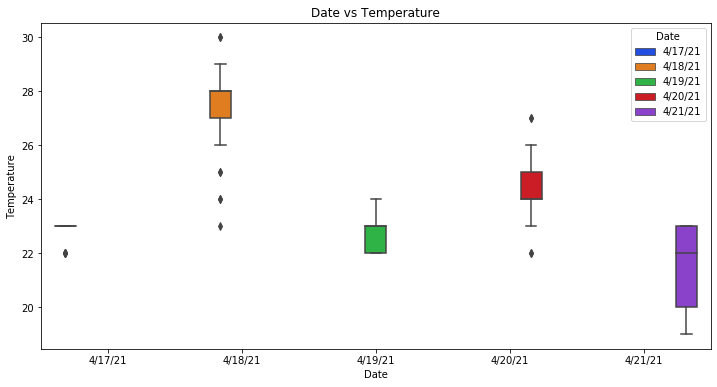

In [7]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=data, x="Date", y="Temperature",hue='Date',palette="bright")
ax.set_title("Date vs Temperature")


Text(0.5, 1.0, 'Date vs Humidity')

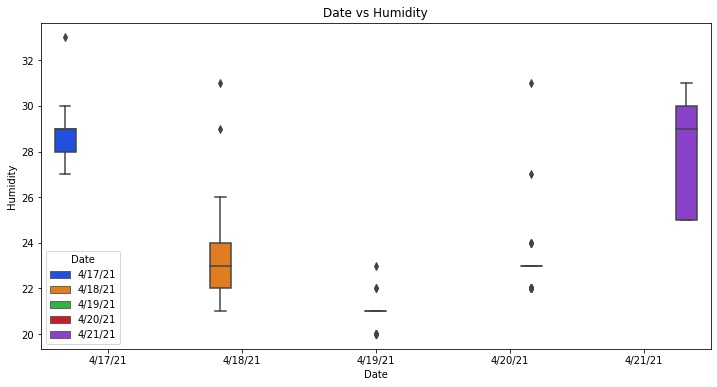

In [8]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=data, x="Date", y="Humidity",hue='Date',palette="bright")
ax.set_title("Date vs Humidity")


# Line Grid Plot

In [9]:
data1=pd.read_excel("plottingdata.xlsx")
data1


,Temperature(Day1),Humidity(Day1),Temperature(Day2),Humidity(Day2),Temperature(Day3),Humidity(Day3)
0,23,29,23,31,23,23
1,23,33,24,29,23,21
2,23,29,24,26,23,21
3,23,29,25,24,23,21
4,23,29,25,24,23,21
...,...,...,...,...,...,...
56,23,27,29,23,22,22
57,23,28,29,23,22,21
58,23,27,29,22,22,21
59,23,27,30,22,22,21


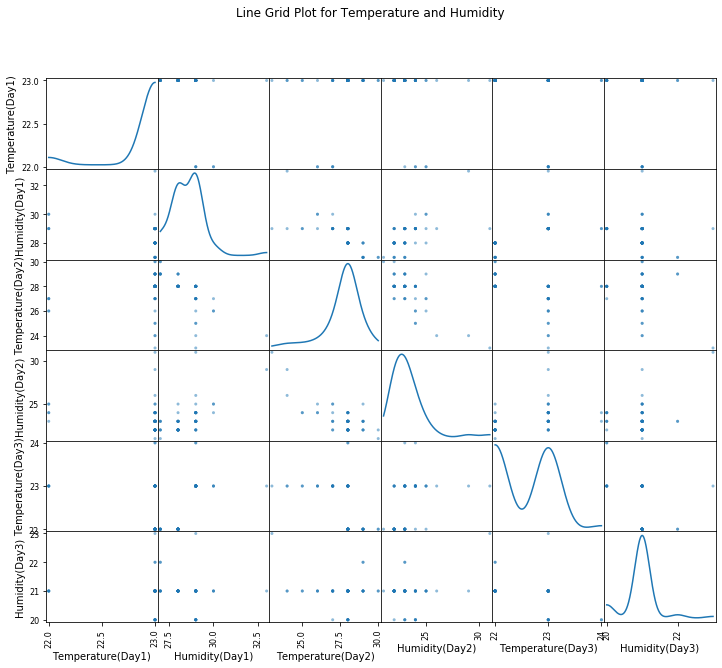

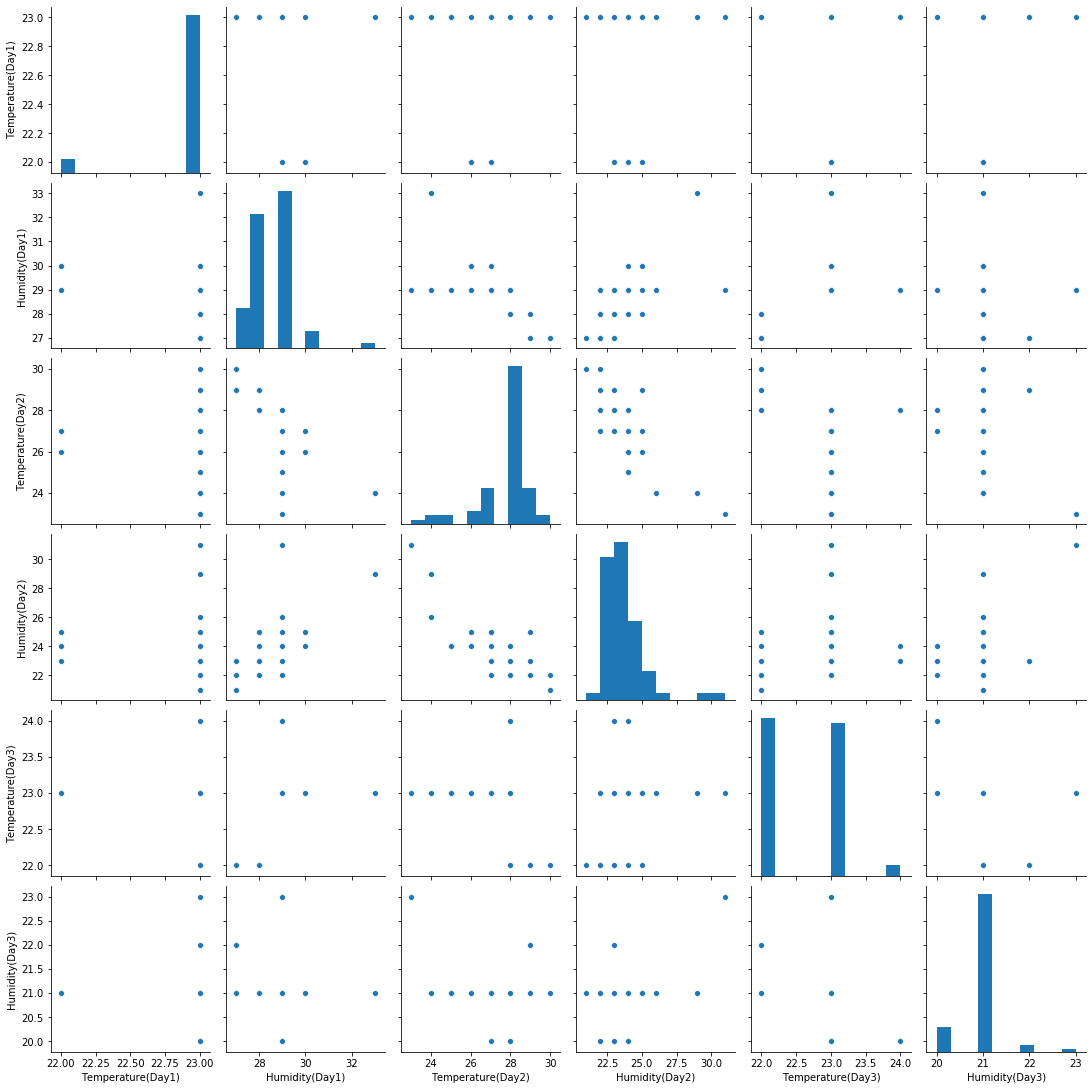

In [10]:
pd.plotting.scatter_matrix(data1,diagonal='kde',figsize=(12,10))
plt.suptitle("Line Grid Plot for Temperature and Humidity")
sns.pairplot(data1)


# Component 3.Data Analysis

# Extracting time from the timestamp column and representing it in minutes form

In [11]:
def minutes(Time):
    hours,minutes,seconds = tuple(Time.split(':'))
    return int(hours)*60+int(minutes)
data['Minutes']=data['Time'].apply(lambda x: minutes(x))
data

,Timestamp,Temperature,Humidity,Location,Date,Time,Minutes
0,2021-04-17 15:52:00,23,29,Library,4/17/21,15:52:00,952
1,2021-04-17 15:54:00,23,33,Library,4/17/21,15:54:00,954
2,2021-04-17 15:56:00,23,29,Library,4/17/21,15:56:00,956
3,2021-04-17 15:58:00,23,29,Library,4/17/21,15:58:00,958
4,2021-04-17 16:00:00,23,29,Library,4/17/21,16:00:00,960
...,...,...,...,...,...,...,...
300,2021-04-21 20:47:00,20,25,Home,4/21/21,20:47:00,1247
301,2021-04-21 20:49:00,19,25,Home,4/21/21,20:49:00,1249
302,2021-04-21 20:51:00,19,25,Home,4/21/21,20:51:00,1251
303,2021-04-21 20:53:00,19,25,Home,4/21/21,20:53:00,1253


# Creating Linear Regression model between Temperature and Minutes model(M1)

In [12]:
X1 = data['Temperature'].values.reshape(-1,1)
y1 = data['Minutes'].values.reshape(-1,1)
M1 = LinearRegression() 
M1.fit(X1, y1)
print(M1.coef_[0][0]) 
print(M1.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(M1.intercept_[0], M1.coef_[0][0]))
predictions1 = M1.predict(X1)


-47.79242569511028
2057.459731543625
The linear model is: Y = 2057.5 + -47.792X


# Creating a linear regression model between Humidity and Minutes model(M2)

In [13]:
X2 = data['Humidity'].values.reshape(-1,1)
y2 = data['Minutes'].values.reshape(-1,1)
M2 = LinearRegression() 
M2.fit(X2, y2)
print(M2.coef_[0][0]) 
print(M2.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(M2.intercept_[0], M2.coef_[0][0]))
predictions2 = M2.predict(X2)

29.591315216073163
187.88175534266202
The linear model is: Y = 187.88 + 29.591X


# Creating a linear regression model between temperature, humidity and minutes such that temperature is the response variable model(M3)

In [22]:
X3 = data[['Humidity','Minutes']]
y3 = data['Temperature']
M3 = LinearRegression() 
M3.fit(X3, y3)
print(M3.coef_) 
print(M3.intercept_)
predictions3 = M3.predict(X3)


[-0.04184653 -0.00646642]
30.784433187381374


# Computing Mean Squared Error and AIC for M1, M2,and  M3.

In [15]:
#For M1
error1=mean_squared_error(y1,predictions1) 
print('Mean Squared Error for model M1:',error1)
resid1 = y1 - predictions1
sse_M1 = sum(resid1**2) # sum of squares
AIC_M1 = 2*1 - 2*np.log(sse_M1)
print('AIC of model 1',AIC_M1)

#For M2
error2=mean_squared_error(y2,predictions2) 
print('\nMean Squared Error for model M2:',error2)
resid2 = y2 - predictions2
sse_M2 = sum(resid2**2) # sum of squares
AIC_M2 = 2*1 - 2*np.log(sse_M2)
print('AIC of model 2',AIC_M2)

#For M3
error3=mean_squared_error(y3,predictions3) 
print('\nMean Squared Error for model M3:',error3)
resid3 = y3 - predictions3
sse_M3 = sum(resid3**2) # sum of squares
AIC_M3 = 2*1 - 2*np.log(sse_M3)
print('AIC of model 3',AIC_M3)

print('\nAIC of model 1, model 2, and model 3 are', np.round(AIC_M1,2), np.round(AIC_M2,2), np.round(AIC_M3,2))



Mean Squared Error for model M1: 25836.515725445217
AIC of model 1 [-29.75971177]

Mean Squared Error for model M2: 28708.963877620474
AIC of model 2 [-29.97055292]

Mean Squared Error for model M3: 3.673273366417648
AIC of model 3 -12.042789933198286

AIC of model 1, model 2, and model 3 are [-29.76] [-29.97] -12.04


# Plotting the predicted and actual values of the response variable for all the three models. 

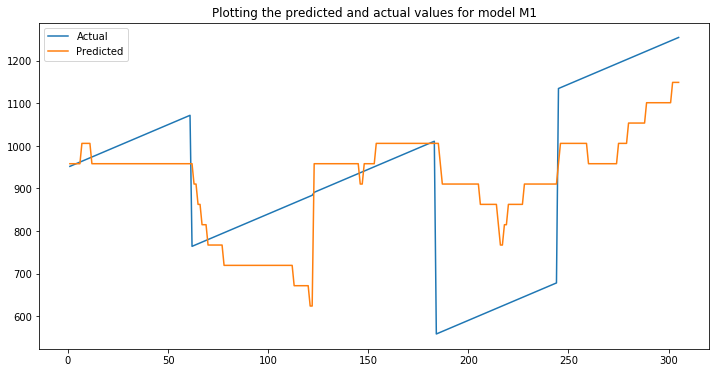

In [16]:
#For model M1
df1 = pd.DataFrame({'Actual':y1.flatten(),'Predicted':predictions1.flatten()})
df1.index = range(1,len(y1)+1)
df1.plot(title="Plotting the predicted and actual values for model M1",figsize=(12,6))



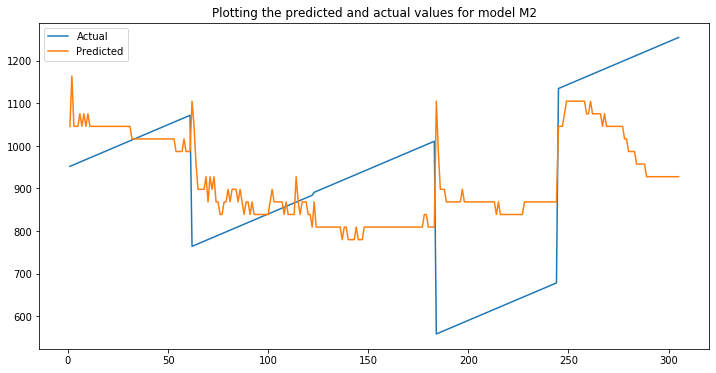

In [17]:
#For model M2
df2 = pd.DataFrame({'Actual':y2.flatten(),'Predicted':predictions2.flatten()})
df2.index = range(1,len(y2)+1)
df2.plot(title="Plotting the predicted and actual values for model M2",figsize=(12,6))


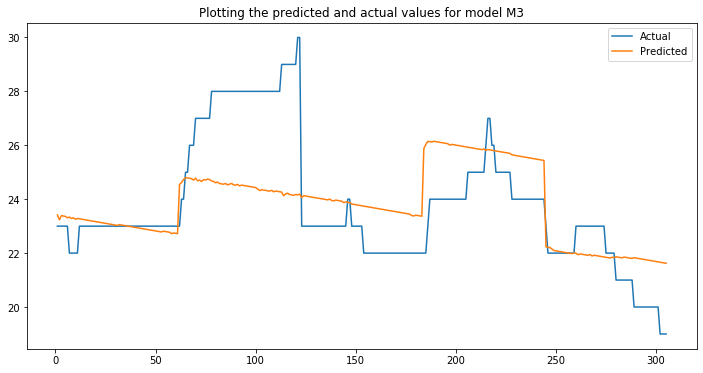

In [18]:
#For model M3
df3 = pd.DataFrame({'Actual':y3,'Predicted':predictions3})
df3.index = range(1,len(y3)+1)
df3.plot(title="Plotting the predicted and actual values for model M3",figsize=(12,6))
